In [1]:
import torch
import math

In [2]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype = torch.float32, device = "cpu")
y = torch.sin(x)
print(x,y)

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416]) tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


In [3]:
x_train = x.reshape(-1,1)
y_train = torch.reshape(y,(-1,1))
print(x_train.shape, x.shape)
print(y_train.shape, y.shape)

torch.Size([2000, 1]) torch.Size([2000])
torch.Size([2000, 1]) torch.Size([2000])


In [4]:
hidden_nodes = 5
class SimpleAnn(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,hidden_nodes)
        self.outputL = torch.nn.Linear(hidden_nodes,1)
    
    def forward(self,x):
        l1 = self.hiddenL(x)
        print("\n***Net Input of Hidden Layer****\n",l1)
        print("Size : ",l1.shape)
        h1 = torch.relu(l1)
        print("\n***Hidden Layer Output****\n",h1)
        print("Size : ",h1.shape)
        l2 = self.outputL(h1)
        print("\n\n***Predicted Value****\n",l2)
        print("Size : ",l2.shape)
        return l2
        
model = SimpleAnn()
print(model)

SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=5, bias=True)
  (outputL): Linear(in_features=5, out_features=1, bias=True)
)


In [5]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-2)
epochs = 1

In [6]:
for epoch in range(epochs):
    optimizer.zero_grad()    
    
    #Forward pass
    output = model(x_train)
    
    #Calculate the loss
    loss = criterion(y_train, output)
    print("Loss = ",loss)
    
    if epoch%50 == 0:
        print(f"Epoch : {epoch}, loss : {loss.item()}")
        
    print("\n*** Before backward Propogation***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)

    #Backpropagate 
    loss.backward()
    
    print("\n*** After backward Propogation***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)

    #Update weights
    optimizer.step()
    
    print("\n*** After changing weigths***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)



***Net Input of Hidden Layer****
 tensor([[ 0.5990,  0.9115, -1.5576,  1.1018,  1.7347],
        [ 0.5983,  0.9100, -1.5567,  1.1005,  1.7338],
        [ 0.5976,  0.9086, -1.5557,  1.0993,  1.7330],
        ...,
        [-0.8054, -1.9777,  0.3493, -1.3867,  0.0284],
        [-0.8061, -1.9792,  0.3503, -1.3880,  0.0275],
        [-0.8068, -1.9806,  0.3512, -1.3892,  0.0267]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.5990, 0.9115, 0.0000, 1.1018, 1.7347],
        [0.5983, 0.9100, 0.0000, 1.1005, 1.7338],
        [0.5976, 0.9086, 0.0000, 1.0993, 1.7330],
        ...,
        [0.0000, 0.0000, 0.3493, 0.0000, 0.0284],
        [0.0000, 0.0000, 0.3503, 0.0000, 0.0275],
        [0.0000, 0.0000, 0.3512, 0.0000, 0.0267]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.6554],
        [-0.6551],
        [-0.6547],
        ...,
        [ 0.1039],
        [ 0.1045],
        [ 0.1051]], grad_fn

In [7]:
torch.save(model,"firstModel.pt")

In [8]:
model = torch.load("firstModel.pt")
model.eval()
ypred = model(torch.Tensor(x_train[300]))
print(type(x_train[300]), ypred, torch.sin(x_train[300]))


***Net Input of Hidden Layer****
 tensor([ 0.3717,  0.4782, -1.2985,  0.7366,  1.5567], grad_fn=<AddBackward0>)
Size :  torch.Size([5])

***Hidden Layer Output****
 tensor([0.3717, 0.4782, 0.0000, 0.7366, 1.5567], grad_fn=<ReluBackward0>)
Size :  torch.Size([5])


***Predicted Value****
 tensor([-0.4955], grad_fn=<AddBackward0>)
Size :  torch.Size([1])
<class 'torch.Tensor'> tensor([-0.4955], grad_fn=<AddBackward0>) tensor([-0.8093])


In [9]:
model = torch.load("firstModel.pt")
model.eval()
ypred = model(x_train)
print(x[300], ypred, torch.sin(x[300]))


***Net Input of Hidden Layer****
 tensor([[ 0.5781,  0.9124, -1.5995,  1.1129,  1.8565],
        [ 0.5774,  0.9110, -1.5985,  1.1117,  1.8555],
        [ 0.5767,  0.9095, -1.5975,  1.1104,  1.8545],
        ...,
        [-0.7956, -1.9782,  0.4042, -1.3919, -0.1395],
        [-0.7963, -1.9796,  0.4052, -1.3932, -0.1405],
        [-0.7970, -1.9811,  0.4062, -1.3945, -0.1415]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.5781, 0.9124, 0.0000, 1.1129, 1.8565],
        [0.5774, 0.9110, 0.0000, 1.1117, 1.8555],
        [0.5767, 0.9095, 0.0000, 1.1104, 1.8545],
        ...,
        [0.0000, 0.0000, 0.4042, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4052, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4062, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.6086],
        [-0.6082],
        [-0.6079],
        ...,
        [ 0.1973],
        [ 0.1977],
        [ 0.1980]], grad_fn


***Net Input of Hidden Layer****
 tensor([[ 0.5781,  0.9124, -1.5995,  1.1129,  1.8565],
        [ 0.5774,  0.9110, -1.5985,  1.1117,  1.8555],
        [ 0.5767,  0.9095, -1.5975,  1.1104,  1.8545],
        ...,
        [-0.7956, -1.9782,  0.4042, -1.3919, -0.1395],
        [-0.7963, -1.9796,  0.4052, -1.3932, -0.1405],
        [-0.7970, -1.9811,  0.4062, -1.3945, -0.1415]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.5781, 0.9124, 0.0000, 1.1129, 1.8565],
        [0.5774, 0.9110, 0.0000, 1.1117, 1.8555],
        [0.5767, 0.9095, 0.0000, 1.1104, 1.8545],
        ...,
        [0.0000, 0.0000, 0.4042, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4052, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4062, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.6086],
        [-0.6082],
        [-0.6079],
        ...,
        [ 0.1973],
        [ 0.1977],
        [ 0.1980]], grad_fn

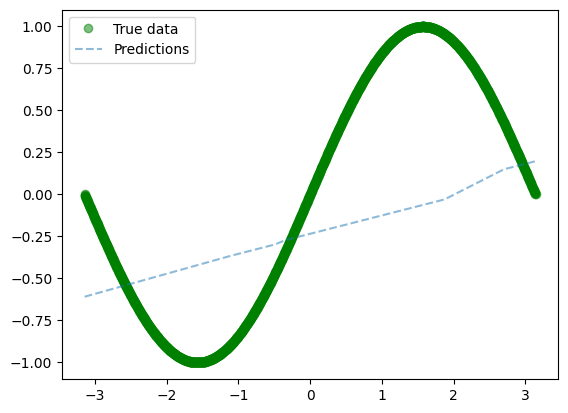

In [10]:
import matplotlib.pyplot as plt
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))
    
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [11]:
hidden_nodes = 10
class SimpleAnn(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,hidden_nodes)
        self.linear2 = torch.nn.Linear(hidden_nodes,hidden_nodes)
        self.linear3 = torch.nn.Linear(hidden_nodes,1)
    
    def forward(self,x):
        l1 = self.linear1(x)
        h1 = torch.relu(l1)
        l2 = self.linear2(h1)
        obj_relu = torch.nn.ReLU()
        h2 = obj_relu(l2)
        h3 = self.linear3(h2)
        return h3
        
model = SimpleAnn()
print(model)

SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=1, bias=True)
)
